In [ ]:
!pip install -U scikit-learn

In [31]:
#import needed libraries (pandas , numpy , seaborn, matplotlib , sklearn)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [32]:
#target hna hwa hwa speecies lw astkhdmt aldata mn csv file mn kaggale mgbthash mn scikit learn 3alatol
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print(type(iris))
iris

<class 'sklearn.utils._bunch.Bunch'>


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [33]:
# Show the dataset infromation
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [34]:
#Show head of dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [35]:
#Describe the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


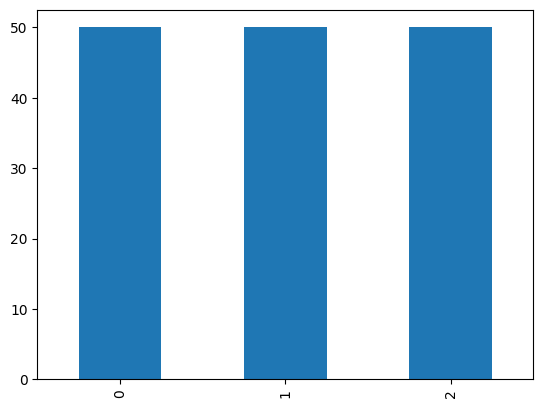

In [36]:
#check the samples for each class / is it balanced dataset
iris_df.target.value_counts().plot(kind= 'bar'); # kda ana hna at2kdt any balanced data set 3ala shakl bar plot
    # bn check al balance 3shan mwdo3 al biasing elly by7sl fy al knn

In [37]:
#value counts of each target (type):
iris_df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [38]:
#check for missing data
print('missing values -> {}'.format (iris_df.isna().sum()))  # -> why ??

missing values -> sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [39]:
#check duplicates
print('dubblicate values -> {}'.format (iris_df.duplicated()))

dubblicate values -> 0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [40]:
#drop duplicates
iris_df.drop_duplicates(inplace = True)
#test after remove the duplicates
print(iris_df.duplicated().sum())

0


In [41]:
##select all rows and all columns except the last one.
X = iris_df.iloc[:,:-1] #iloc deh hya index location
##select all rows, but only the last column.
# y = iris_df.iloc[:,:-1]
y = iris_df.iloc[:, -1]

In [42]:
#check the X head
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
#check the X tail
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [44]:
#check the y head
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [45]:
#check the y tail
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int64

In [47]:
#split the data into train and test sets (80,20):
#Shuffle=True, meaning the data will be shuffled before splitting.
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=0)
# 0.2 deh y3ny 3awez 20% mn aldata elly 3ndy deh test y3ny 20% mn al 150 sample elly 3ndy
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [48]:
#check the traing set size and test set size:
print("Training set size:", len(X_train), "samples")
print("Test set size:", len(X_test), "samples")

Training set size: 119 samples
Test set size: 30 samples


In [49]:
#check the traing set shape and test set shape:
print("Training set shape:", X_train.shape, "samples")
print("Test set shape:", X_test.shape, "samples")

Training set shape: (119, 4) samples
Test set shape: (30, 4) samples


3 steps of knn:

In [51]:
def distance_ecu(x_train, x_test_point):
    """
    Calculate the Euclidean distance between a test point and each point in the training data.

    Parameters:
        - x_train: The training data (2D array or DataFrame).
        - x_test_point: The test point (1D array or list).

    Returns:
        - distances: The distances between the test point and each point in the training data (DataFrame).
    """
    distances = []

    # Loop over the rows of x_train
    for row in range(len(x_train)):
        current_train_point = x_train[row]
        current_distance = 0

        # Loop over the columns of the row
        for col in range(len(current_train_point)):
            current_distance += (current_train_point[col] - x_test_point[col]) ** 2

        # Calculate the square root of the sum of squared differences
        current_distance = np.sqrt(current_distance)

        # Append the distance to the list of distances
        distances.append(current_distance)

    # Convert distances to a DataFrame
    distances = pd.DataFrame(data=distances, columns=['index'])

    return distances


In [52]:
def nearest_neighbors(distance_point , k):
    """
    Input:
        - distance_point : The distances between the the test point and each point in the training data.
        - K              : The number of neighbors

    Output:
        - df_nearest : The nearest K neighbors between the test point and the training data

    """
    # Sort distances using the sort_values function
    #df_nearest = distance_point.sort_values(by = ['index'], axis = 0 )
    df_nearest = sorted(distance_point)

    ## Take only the first K neighbors
    df_nearest = df_nearest[:k]
    return df_nearest

In [53]:
def voting(df_nearest , y_train):
    """
    Input:
        - df_nearest: Dataframe contains the nearest K neighbors between the Full training dataset and the test point
        - y_train : The labels of the training dataset

    Output:
        - y_pred : The prediction based on Majority Voting

    """
    ## Use the Counter Object to get the labels with K nearest neighbors
    # counter_vote  = Counter(y_train[df_nearest.index])
    counter_vote  = Counter(y_train[df_nearest])
    ## Majority Voting !
    y_pred = counter_vote.most_common(1)[0][0]

    return y_pred

KNN Full Algorithm : Putting Everything Together

In [54]:
def KNN_from_scratch(X_train, y_train, X_test, K):
    """
    Perform k-nearest neighbors classification from scratch.

    Inputs:
    - x_train: The full training dataset.
    - y_train: The labels of the training dataset.
    - x_test: The full test dataset.
    - k: The number of neighbors to consider.

    Output:
    - y_pred: The predictions for the whole test set based on majority voting.
    """
    y_pred = []
    for i in range(len(X_test)):
          # Loop over all the test set and perform the three steps
        distances = []
        for j in range(len(X_train)):
            distances.append([np.sqrt(np.sum(np.square(X_test[i] - X_train[j]))), j])
        distances.sort(key=lambda x: x[0])
        df_nearest = np.array(distances[:K])[:, 1].astype(int)
        y_pred.append(voting(df_nearest, y_train))
    return y_pred

In [56]:
K = 3
y_pred_scratch = KNN_from_scratch(X_train, y_train, X_test, K)
print(y_pred_scratch)

accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f'The accuracy of our implementation is {accuracy_scratch*100} %')

[1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2]
The accuracy of our implementation is 96.66666666666667 %


In [57]:
K = 5
y_pred_scratch = KNN_from_scratch(X_train, y_train, X_test, K)
print(y_pred_scratch)

accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f'The accuracy of our implementation is {accuracy_scratch*100} %')

[2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2]
The accuracy of our implementation is 100.0 %


In [59]:
K = 7
y_pred_scratch = KNN_from_scratch(X_train, y_train, X_test, K)
print(y_pred_scratch)

accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f'The accuracy of our implementation is {accuracy_scratch*100} %')

[1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2]
The accuracy of our implementation is 96.66666666666667 %


In [60]:
#the scaler is fitted to the training set / the Normalizer calculates the normalization parameters based on the training set.
scale = Normalizer().fit(X_train)
#the scaler is applied to the training set / this step scales each feature in the training set independently.
x_train_normalized = scale.transform(X_train)
##the scaler is applied to the test set
x_test_normalized = scale.transform(X_test)

In [61]:
print("X train before Normalization")
print(X_train[0:5])
print("\nX train after Normalization")
print(x_train_normalized[0:5])

X train before Normalization
[[5.2 3.5 1.5 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.9 4.2 1.3]
 [5.6 2.5 3.9 1.1]
 [5.7 3.8 1.7 0.3]]

X train after Normalization
[[0.80641965 0.54278246 0.23262105 0.03101614]
 [0.75728103 0.3542121  0.52521104 0.15878473]
 [0.73446047 0.37367287 0.5411814  0.16750853]
 [0.76185188 0.34011245 0.53057542 0.14964948]
 [0.8068282  0.53788547 0.24063297 0.04246464]]


Text(0.5, 1.08, 'Pair Plot of the dataset Before normalization')

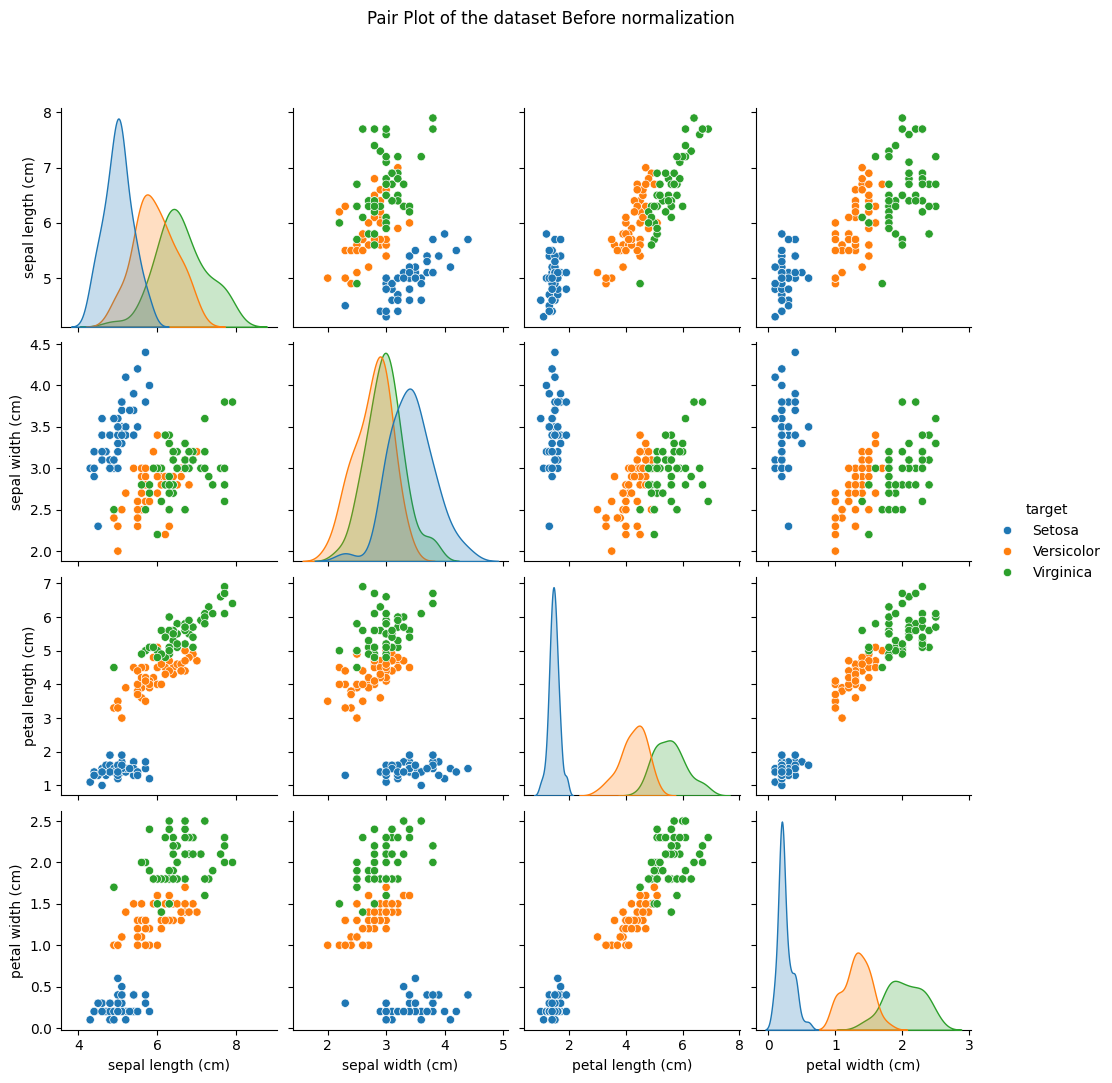

In [63]:
## Graph Before normalization
# view the relationships between variables; color code by species type
di = {0.0: "Setosa", 1.0: "Versicolor", 2.0 : "Virginica"}
before = sns.pairplot(iris_df.replace({"target": di}), hue='target')
before.fig.suptitle("Pair Plot of the dataset Before normalization", y=1.08)

Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

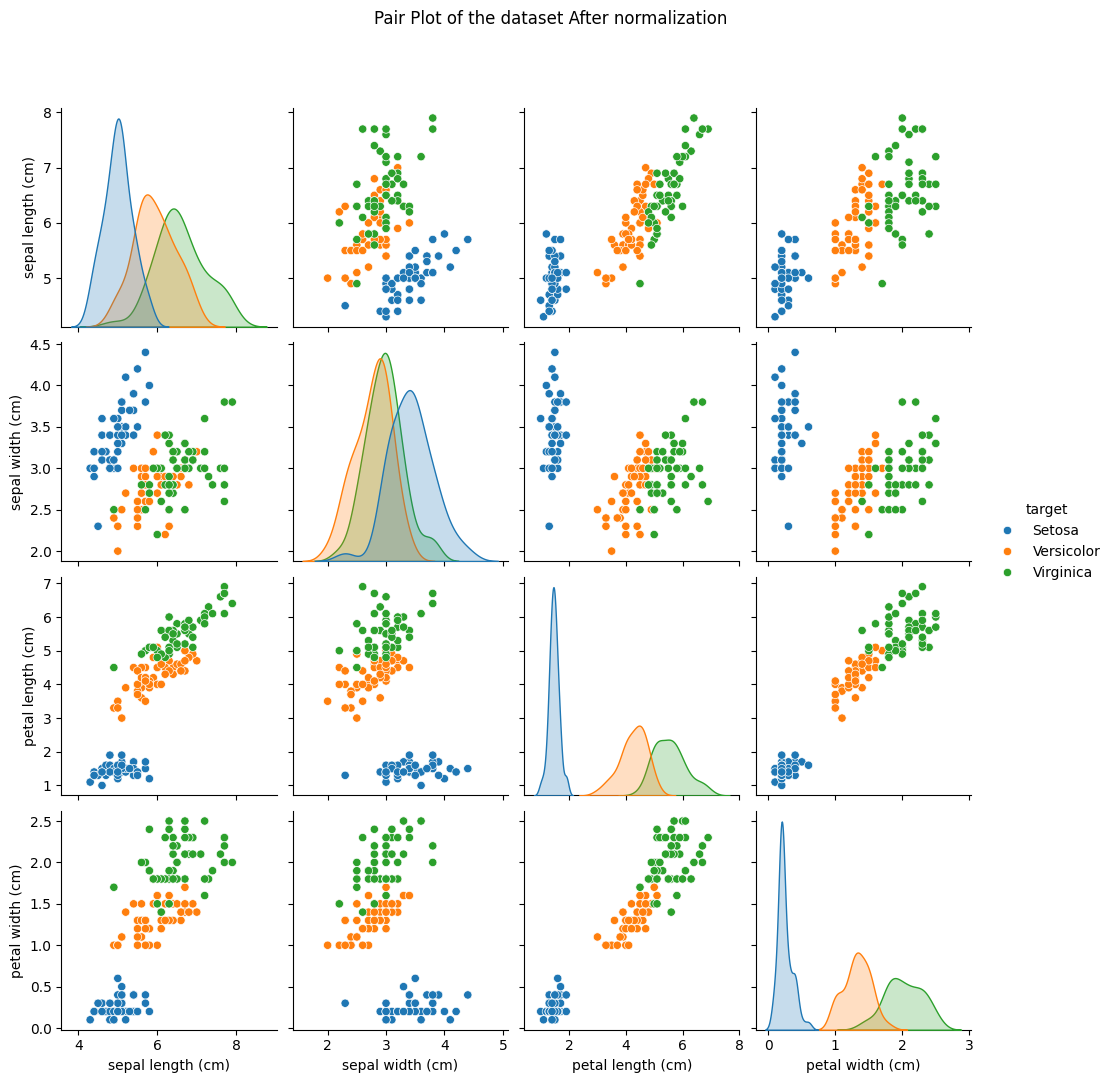

In [64]:
## Graph after normalization
# view the relationships between variables; color code by species type
iris_df_2 = pd.DataFrame(data = np.c_[iris['data'],iris['target']],
                       columns = iris['feature_names'] + ['target'])
di2 = {0.0: "Setosa", 1.0: "Versicolor", 2.0 : "Virginica"}
after = sns.pairplot(iris_df_2.replace({"target": di}), hue='target')
after.fig.suptitle("Pair Plot of the dataset After normalization", y=1.08)

In [65]:
#check corroleation
correlation_matrix = iris_df.corr()

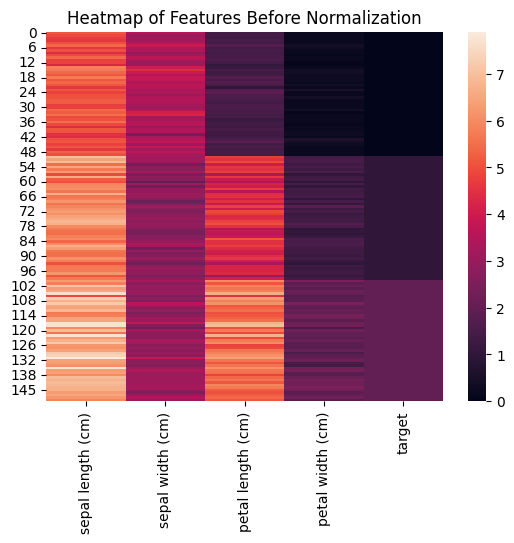

In [66]:
sns.heatmap(data=iris_df)
plt.title("Heatmap of Features Before Normalization")
plt.show()

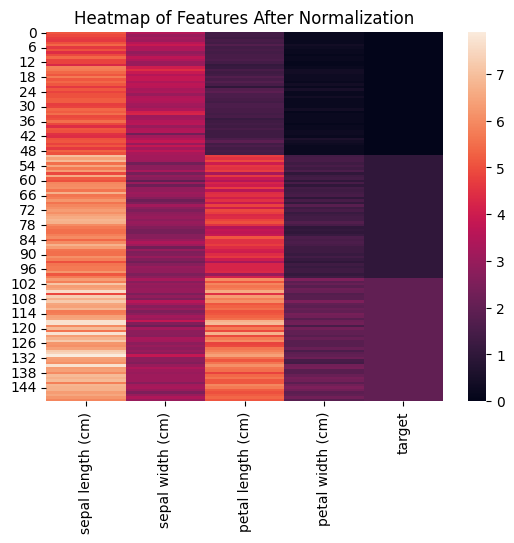

In [67]:
sns.heatmap(data=iris_df_2)
plt.title("Heatmap of Features After Normalization")
plt.show()

In [68]:
print("\nAfter normalization:")
k = 3
y_pred_normalized = KNN_from_scratch(X_train, y_train, X_test, k)
accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
print(f"Accuracy for K={k}: {accuracy_normalized*100} %")


After normalization:
Accuracy for K=3: 96.66666666666667 %


In [69]:
print("\nAfter normalization:")
k = 5
y_pred_normalized = KNN_from_scratch(X_train, y_train, X_test, k)
accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
print(f"Accuracy for K={k}: {accuracy_normalized *100} %")


After normalization:
Accuracy for K=5: 100.0 %


In [70]:
print("\nAfter normalization:")
k = 7
y_pred_normalized = KNN_from_scratch(X_train, y_train, X_test, k)
accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
print(f"Accuracy for K={k}: {accuracy_normalized*100} %")


After normalization:
Accuracy for K=7: 96.66666666666667 %


In [71]:
print("\nAfter normalization:")
for k in [3, 5, 7]:
    y_pred_normalized = KNN_from_scratch(X_train, y_train, X_test, k)
    accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
    print(f"Accuracy for K={k}: {accuracy_normalized*100} %")


After normalization:
Accuracy for K=3: 96.66666666666667 %
Accuracy for K=5: 100.0 %
Accuracy for K=7: 96.66666666666667 %
